[array([-1000.,    -5.,     5.,  1000.]), array([-999.75      ,   -5.27493781,    4.77493781, 1000.25      ]), array([-999.5       ,   -5.59901951,    4.59901951, 1000.5       ]), array([-999.25      ,   -5.97015325,    4.47015325, 1000.75      ]), array([-999.        ,   -6.38516481,    4.38516481, 1001.        ]), array([-998.75      ,   -6.84016994,    4.34016994, 1001.25      ]), array([-998.5       ,   -7.33095189,    4.33095189, 1001.5       ]), array([-998.25      ,   -7.85327781,    4.35327781, 1001.75      ]), array([-998.        ,   -8.40312424,    4.40312424, 1002.        ]), array([-997.75      ,   -8.97681202,    4.47681202, 1002.25      ]), array([-997.5       ,   -9.57106781,    4.57106781, 1002.5       ]), array([-997.25      ,  -10.18303437,    4.68303437, 1002.75      ]), array([-997.        ,  -10.81024968,    4.81024968, 1003.        ]), array([-996.75      ,  -11.45060973,    4.95060973, 1003.25      ]), array([-996.5       ,  -12.10232527,    5.10232527, 1003.5   

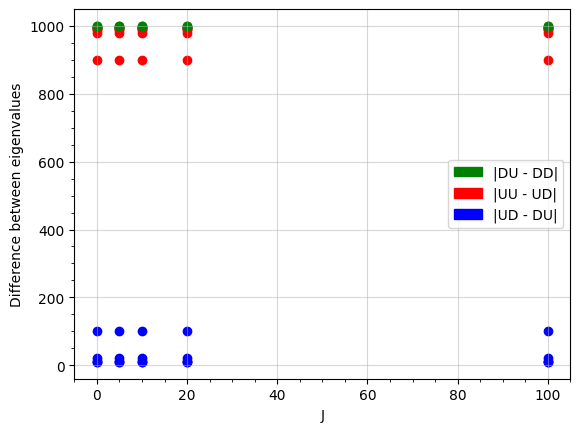

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

#States: |↑↑>, |↑↓>, |↓↑>, |↓↓>

w0 = 1000
delta = 10
J = [0, 5, 10, 20, 100]
J_spectrum = np.linspace(0,5000,5001)

#Identity matrix 2x2
I = np.identity(2)

#Spin operators (pauli matricies)
S_Z = (0.5)*(sp.constants.hbar)*np.array([[1,0],[0,-1]])
S_X = (0.5)*(sp.constants.hbar)*np.array([[0,1],[1,0]])
S_Y = (0.5)*(sp.constants.hbar)*np.array([[0,-1j],[1j,0]]) #j here is the imaginary number (numpy notation)

#Spin operators (pauli matricies - normalised) - im normalising because I_AZ@I_BZ gives elements in order of x10^-69 so essentially zero
S_Znorm = (0.5)*np.array([[1,0],[0,-1]])
S_Xnorm = (0.5)*np.array([[0,1],[1,0]])
S_Ynorm = (0.5)*np.array([[0,-1j],[1j,0]])

#Nuclear spin operators
I_AZ = np.kron(S_Z,I)
I_BZ = np.kron(I,S_Z)

I_AX = np.kron(S_X,I)
I_BX = np.kron(I,S_X)

I_AY = np.kron(S_Y, I)
I_BY = np.kron(I,S_Y)

I_AP = I_AX + 1j*I_AY
I_BP = I_BX + 1j*I_BY

I_AN = I_AX - 1j*I_AY
I_BN = I_BX - 1j*I_BY

#Normalised nuclear spin operators
I_AZnorm = np.kron(S_Znorm,I)
I_BZnorm = np.kron(I,S_Znorm)

I_AXnorm = np.kron(S_Xnorm,I)
I_BXnorm = np.kron(I,S_Xnorm)

I_AYnorm = np.kron(S_Ynorm, I)
I_BYnorm = np.kron(I,S_Ynorm)

I_APnorm = I_AXnorm + 1j*I_AYnorm
I_BPnorm = I_BXnorm + 1j*I_BYnorm

I_ANnorm = I_AXnorm - 1j*I_AYnorm
I_BNnorm = I_BXnorm - 1j*I_BYnorm

#States
UU = np.array([[1],[0],[0],[0]])
UD = np.array([[0],[1],[0],[0]])
DU = np.array([[0],[0],[1],[0]])
DD = np.array([[0],[0],[0],[1]])
states = np.array([UU,UD,DU,DD])

def HamilitonianNorm(w0,delta,J):
  H = (w0 + delta/2)*I_AZnorm + (w0 - delta/2)*I_BZnorm + J*(I_AZnorm@I_BZnorm + (0.5)*(I_APnorm@I_BNnorm + I_ANnorm@I_BPnorm)) #changed * to @ for matrix multiplication
  return(H)

def ApplyHamilitonian(w0,delta,J,state):
  H = []
  for i in J:
    for j in state:
      H.append(HamilitonianNorm(w0,delta,i)@j)

def SpectrumNorm(w0,delta,J):
  H_array = []
  seen = []
  EigVals = []
  for i in J:
    H = HamilitonianNorm(w0,delta,i)
    H_array.append(H)  # Creates a list of the Hamiltionian matricies - doing this so i can check if they are equal, which i don't think they should be
    eigenvalues = np.linalg.eigvalsh(H) #Getting eigen values
    EigVals.append(eigenvalues) #Appending to a list
    #print(f"J = {i}: Eigenvalues = {eigenvalues}")


  for H in H_array:
    if any(np.array_equal(H, seen_H) for seen_H in seen):  # checks if matricies are the exact same
            print("duplicates found:\n", H)
    seen.append(H)
    return EigVals

# eigenvalues_list = SpectrumNorm(w0, delta, J_spectrum)
eigenvalues_list2 = SpectrumNorm(w0, delta, J_spectrum)
eigenvalues_list5 = SpectrumNorm(w0, delta, J)
eigenvalues_list3 = np.ravel(eigenvalues_list2)
# Transpose to group eigenvalues for each J separately
eigenvalues_list = np.array(eigenvalues_list2).T
#print(eigenvalues_list)
# Plot each eigenvalue trajectory across J values
  # for i, eigenvalues in enumerate(eigenvalues_list):
  #     pl.scatter( J_spectrum, eigenvalues, marker='.', s=20, label=f"Eigenvalue {i+1}")


#window function for attempted differences between energy levels plot
for i in eigenvalues_list5:
  diff1 = abs(i[0] - i[1])
  diff2 = abs(i[1] - i[2])
  diff3 = abs(i[2] - i[3])
  for j in J:
    pl.scatter(j,diff1, label = 'UU - UD',color= 'red')
    pl.scatter(j,diff2, label = 'UD - DU',color= 'blue')
    pl.scatter(j,diff3, label = 'DU - DD',color= 'green')
  print(i)
pl.grid(True, alpha = 0.5)
pl.minorticks_on()
patchList = []
legend_dict = { '|DU - DD|' : 'green', '|UU - UD|' : 'red', '|UD - DU|' : 'blue' }
pl.xlabel('J')
pl.ylabel('Difference between eigenvalues')
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

pl.legend(handles=patchList)
pl.show()

#Figure 1 and 2 in the report
for i, eigenvalues in enumerate(eigenvalues_list):
    #pl.scatter( J_spectrum, abs(eigenvalues), marker='.', s=20, label=f"Eigenvalue {i+1}")     this is the absolute values of the eigenvalues.
    pl.scatter( J_spectrum, eigenvalues, marker='.', s=20, label=f"Eigenvalue {i+1}")

pl.plot([w0,w0],[-5000,5500], linestyle = '--', color = 'black', label = '$\omega_{0}$')

pl.xlabel("J")
pl.ylabel("Eigenvalues")
pl.title("Eigenvalue Spectrum vs J")
# pl.xlim(-200,5200)
# pl.ylim(-4000,2500)
# pl.xlim(990,1010)
# pl.ylim(-760,-740)
pl.grid(True, alpha = 0.5)
pl.legend(loc='lower right')
#print(I_AZnorm)
pl.clf()




